**Variables**:
* 'Startup number' - index of start,
* 'Burner number' - 
* 'Attempt to start' - number of attempt to start the burner in the startup, 
* 'Attempt beginning' - timestampt, beginning of the attempt,
* 'Attempt end' -
* 'Beginning of analyzed period' - timestamp - moment from which data is analyzed,
* 'End of analyzed period' -
* 'Steam valve opened' - time at which steam started to flow to the burner
* 'Steam valve closed' - 
* 'Valve opening duration' - 
* 'Mean value of burner brightness (flame sensor)' - fuel brightnes during the attempt
* 'Flame goes out' - timestamp at which flame is lost
* 'Mean steam pressure' - steam pressure during the attempt (when steam valve was open)
* 'Drop of brigthness (flame sensor)' - drop of brightness when the flame was going down
* 'Drop of steam pressure' - drop of steam pressure when the flame was going down
* 'Downtime before startup' -
* 'Attempt outcome' - result of the attempt (no ignition - other issues, succeed - ignited and maintained, failed - ignited but went down quickly) 
* 'Burner warmup time by steam[h]' -
* 'Mean temperature in the warmup time' -
* 'Mean steam temperature for an hour before start' -
* 'Mean steam pressure for an hour before start' - mean steam pressure for an hour before start
* 'Mean fuel oil pressure' - mean fuel oil pressure during the attempt
* 'Ratio of mean pressures' - mean steam pressure/mean fuel oil pressure
* 'Mean steam pressure in ring 1' - during attempt
* 'Mean fuel oil pressure in ring 1' - during attempt
* 'Ratio of pressure in ring 1' - during attempt
* 'Startup order (burner numbers)' -  
* 'Startup order - first 4' - 
* 'Fuel oil temperature before startup' - seconds before startup

Read the 'aggregated_data.csv' to dataframe.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu as MWU
import datetime as dt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor

In [2]:
df = pd.read_csv('aggregated_data.csv')
pd.options.display.max_columns = None
df.head(5)

,Startup number,Burner number,Attempt to start,Attempt beginning,Attempt end,Beginning of analyzed period,End of analyzed period,Steam valve opened,Steam valve closed,Valve opening duration,Mean value of burner brightness (flame sensor),Flame goes out,Mean steam pressure,Drop of brigthness (flame sensor),Drop of steam pressure,Downtime before startup,Attempt outcome,Burner warmup time by steam[h],Mean temperature in the warmup time,Mean steam temperature for an hour before start,Mean steam pressure for an hour before start,Mean fuel oil pressure,Ratio of mean pressures,Mean steam pressure in ring 1,Mean fuel oil pressure in ring 1,Ratio of pressure in ring 1,Startup order (burner numbers),Startup order - first 4,Fuel oil temperature before startup
0,1.0,1.0,1.0,2016-01-19 12:36:00,2016-01-14 23:23:00,2016-01-18 21:36:00,2016-01-19 15:36:00,2016-01-19 09:27:12,2016-01-19 14:44:44,0 days 05:17:32.000000000,97.308594,2016-01-19 14:44:43,0.759057,0.430021,0.541096,4 days 13:13:00.000000000,succeed,0.856111,260.191696,260.191696,0.759217,0.385376,1.970068,0.880000,0.460000,1.913044,"3, 1, 4, 2, 7, 5, 8, 6, 4, 3, 7, 2, 3, 4, 3, 4...","3, 1, 4, 2",110.300429
1,1.0,2.0,1.0,2016-01-19 12:36:00,2016-01-14 23:23:00,2016-01-18 21:36:00,2016-01-19 15:36:00,2016-01-19 09:28:16,2016-01-19 09:28:36,0 days 00:00:20.000000000,0.000000,NaN,0.506667,NaN,NaN,4 days 13:13:00.000000000,no ignition,0.873611,260.588541,260.588541,0.600000,0.292222,2.053232,1.000000,0.480000,2.083333,"3, 1, 4, 2, 7, 5, 8, 6, 4, 3, 7, 2, 3, 4, 3, 4...","3, 1, 4, 2",111.005963
2,1.0,2.0,2.0,2016-01-19 12:36:00,2016-01-14 23:23:00,2016-01-18 21:36:00,2016-01-19 15:36:00,2016-01-19 09:57:12,2016-01-19 09:57:31,0 days 00:00:19.000000000,0.000000,NaN,0.488000,NaN,NaN,4 days 13:13:00.000000000,no ignition,1.355833,267.639146,267.639146,0.568750,0.305000,1.864754,0.940000,0.480000,1.958333,"3, 1, 4, 2, 7, 5, 8, 6, 4, 3, 7, 2, 3, 4, 3, 4...","3, 1, 4, 2",110.798885
3,1.0,2.0,3.0,2016-01-19 12:36:00,2016-01-14 23:23:00,2016-01-18 21:36:00,2016-01-19 15:36:00,2016-01-19 10:38:21,2016-01-19 10:38:41,0 days 00:00:20.000000000,0.000000,NaN,0.498095,NaN,NaN,4 days 13:13:00.000000000,no ignition,2.041667,272.374878,272.374878,0.588889,0.296667,1.985019,0.934286,0.450000,2.076190,"3, 1, 4, 2, 7, 5, 8, 6, 4, 3, 7, 2, 3, 4, 3, 4...","3, 1, 4, 2",111.613316
4,1.0,2.0,4.0,2016-01-19 12:36:00,2016-01-14 23:23:00,2016-01-18 21:36:00,2016-01-19 15:36:00,2016-01-19 10:39:37,2016-01-19 10:39:57,0 days 00:00:20.000000000,0.000000,NaN,0.504762,NaN,NaN,4 days 13:13:00.000000000,no ignition,2.062778,272.471120,272.471120,0.584444,0.303333,1.926740,0.980000,0.485714,2.017647,"3, 1, 4, 2, 7, 5, 8, 6, 4, 3, 7, 2, 3, 4, 3, 4...","3, 1, 4, 2",110.080826


,Startup number,Burner number,Attempt to start,Attempt beginning,Attempt end,Beginning of analyzed period,End of analyzed period,Steam valve opened,Steam valve closed,Valve opening duration,Mean value of burner brightness (flame sensor),Flame goes out,Mean steam pressure,Drop of brigthness (flame sensor),Drop of steam pressure,Downtime before startup,Attempt outcome,Burner warmup time by steam[h],Mean temperature in the warmup time,Mean steam temperature for an hour before start,Mean steam pressure for an hour before start,Mean fuel oil pressure,Ratio of mean pressures,Mean steam pressure in ring 1,Mean fuel oil pressure in ring 1,Ratio of pressure in ring 1,Startup order (burner numbers),Startup order - first 4,Fuel oil temperature before startup
0,1.0,1.0,1.0,2016-01-19 12:36:00,2016-01-14 23:23:00,2016-01-18 21:36:00,2016-01-19 15:36:00,2016-01-19 09:27:12,2016-01-19 14:44:44,0 days 05:17:32.000000000,97.308594,2016-01-19 14:44:43,0.759057,0.430021,0.541096,4 days 13:13:00.000000000,succeed,0.856111,260.191696,260.191696,0.759217,0.385376,1.970068,0.880000,0.460000,1.913044,"3, 1, 4, 2, 7, 5, 8, 6, 4, 3, 7, 2, 3, 4, 3, 4...","3, 1, 4, 2",110.300429
1,1.0,2.0,1.0,2016-01-19 12:36:00,2016-01-14 23:23:00,2016-01-18 21:36:00,2016-01-19 15:36:00,2016-01-19 09:28:16,2016-01-19 09:28:36,0 days 00:00:20.000000000,0.000000,NaN,0.506667,NaN,NaN,4 days 13:13:00.000000000,no ignition,0.873611,260.588541,260.588541,0.600000,0.292222,2.053232,1.000000,0.480000,2.083333,"3, 1, 4, 2, 7, 5, 8, 6, 4, 3, 7, 2, 3, 4, 3, 4...","3, 1, 4, 2",111.005963
2,1.0,2.0,2.0,2016-01-19 12:36:00,2016-01-14 23:23:00,2016-01-18 21:36:00,2016-01-19 15:36:00,2016-01-19 09:57:12,2016-01-19 09:57:31,0 days 00:00:19.000000000,0.000000,NaN,0.488000,NaN,NaN,4 days 13:13:00.000000000,no ignition,1.355833,267.639146,267.639146,0.568750,0.305000,1.864754,0.940000,0.480000,1.958333,"3, 1, 4, 2, 7, 5, 8, 6, 4, 3, 7, 2, 3, 4, 3, 4...","3, 1, 4, 2",110.798885
3,1.0,2.0,3.0,2016-01-19 12:36:00,2016-01-14 23:23:00,2016-01-18 21:36:00,2016-01-19 15:36:00,2016-01-19 10:38:21,2016-01-19 10:38:41,0 days 00:00:20.000000000,0.000000,NaN,0.498095,NaN,NaN,4 days 13:13:00.000000000,no ignition,2.041667,272.374878,272.374878,0.588889,0.296667,1.985019,0.934286,0.450000,2.076190,"3, 1, 4, 2, 7, 5, 8, 6, 4, 3, 7, 2, 3, 4, 3, 4...","3, 1, 4, 2",111.613316
4,1.0,2.0,4.0,2016-01-19 12:36:00,2016-01-14 23:23:00,2016-01-18 21:36:00,2016-01-19 15:36:00,2016-01-19 10:39:37,2016-01-19 10:39:57,0 days 00:00:20.000000000,0.000000,NaN,0.504762,NaN,NaN,4 days 13:13:00.000000000,no ignition,2.062778,272.471120,272.471120,0.584444,0.303333,1.926740,0.980000,0.485714,2.017647,"3, 1, 4, 2, 7, 5, 8, 6, 4, 3, 7, 2, 3, 4, 3, 4...","3, 1, 4, 2",110.080826


#### Set the correct data types for all the variables

In [3]:
sub1 = df.copy()
sub1['Attempt beginning'] = pd.to_datetime(sub1['Attempt beginning'])
sub1['Attempt end'] = pd.to_datetime(sub1['Attempt end'])
sub1['Beginning of analyzed period'] = pd.to_datetime(sub1['Beginning of analyzed period'])
sub1['End of analyzed period'] = pd.to_datetime(sub1['End of analyzed period'])
sub1['Steam valve opened'] = pd.to_datetime(sub1['Steam valve opened'])
sub1['Steam valve closed'] = pd.to_datetime(sub1['Steam valve closed'])
sub1['Flame goes out'] = pd.to_datetime(sub1['Flame goes out'])
sub1['Downtime before startup'] = pd.to_timedelta(sub1['Downtime before startup'])
sub1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 29 columns):
 #   Column                                           Non-Null Count  Dtype          
---  ------                                           --------------  -----          
 0   Startup number                                   1158 non-null   float64        
 1   Burner number                                    1158 non-null   float64        
 2   Attempt to start                                 1158 non-null   float64        
 3   Attempt beginning                                1158 non-null   datetime64[ns] 
 4   Attempt end                                      1158 non-null   datetime64[ns] 
 5   Beginning of analyzed period                     1158 non-null   datetime64[ns] 
 6   End of analyzed period                           1158 non-null   datetime64[ns] 
 7   Steam valve opened                               1158 non-null   datetime64[ns] 
 8   Steam valve closed          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 29 columns):
 #   Column                                           Non-Null Count  Dtype          
---  ------                                           --------------  -----          
 0   Startup number                                   1158 non-null   float64        
 1   Burner number                                    1158 non-null   float64        
 2   Attempt to start                                 1158 non-null   float64        
 3   Attempt beginning                                1158 non-null   datetime64[ns] 
 4   Attempt end                                      1158 non-null   datetime64[ns] 
 5   Beginning of analyzed period                     1158 non-null   datetime64[ns] 
 6   End of analyzed period                           1158 non-null   datetime64[ns] 
 7   Steam valve opened                               1158 non-null   datetime64[ns] 
 8   Steam valve closed          

#### Plot barplots showing "Attempt outcome" for all burners. In other words -  show how many times each of the burners has succeded/not succeeded/there was no ignition.

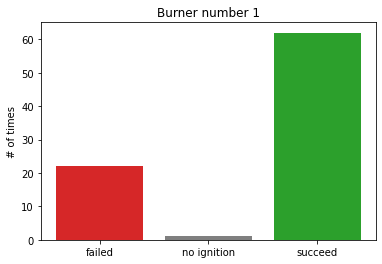

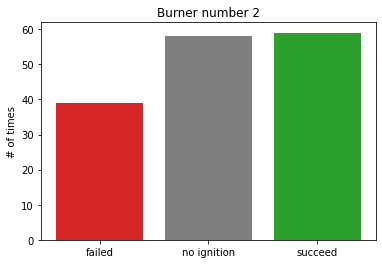

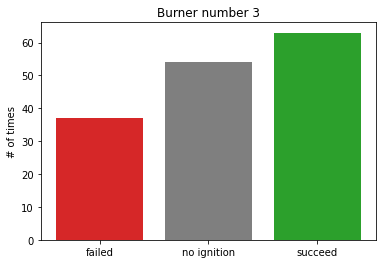

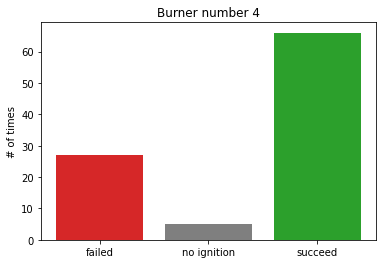

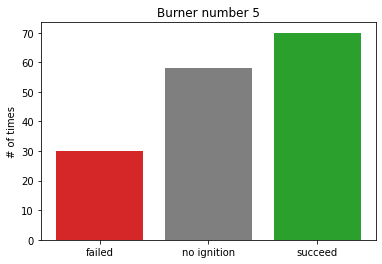

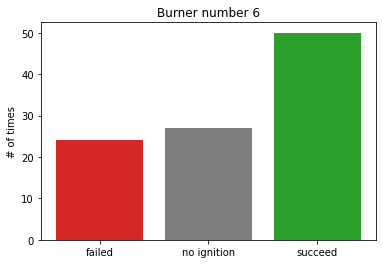

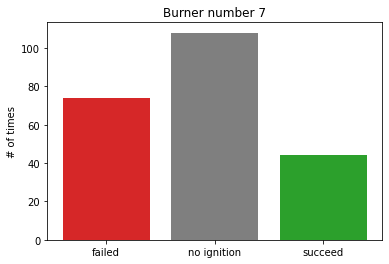

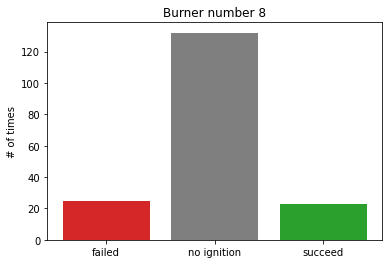

In [21]:
sub2 = sub1.copy()

for i in range(9):
    for j in sub2[['Attempt outcome']]:
        if i>0 and i<9:
            sub3 = sub2[sub2['Burner number']== i]
            sub3 = sub3.groupby('Attempt outcome').count().reset_index()
            plt.bar(sub3.index, sub3['Startup number'], color=['tab:red','tab:grey','tab:green']);
            plt.xticks(sub3.index, sub3['Attempt outcome']);
            plt.ylabel('# of times');
            plt.title('Burner number {}'.format(i));
            plt.show();

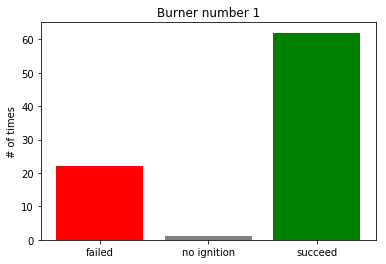

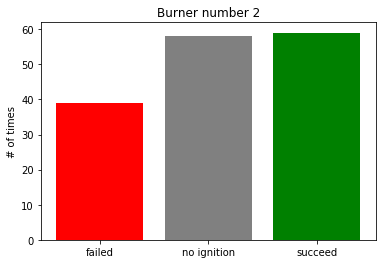

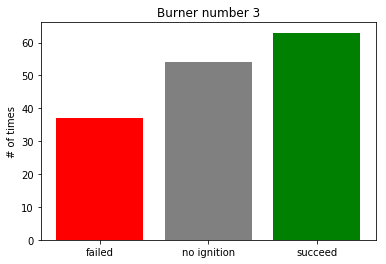

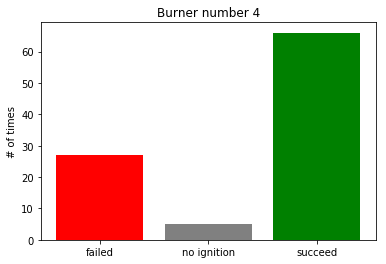

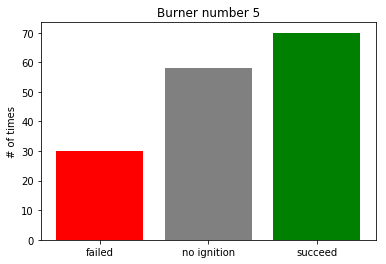

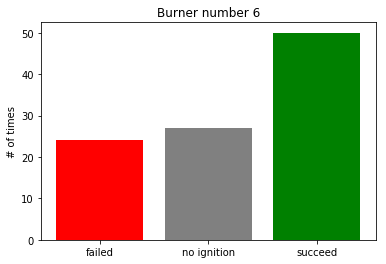

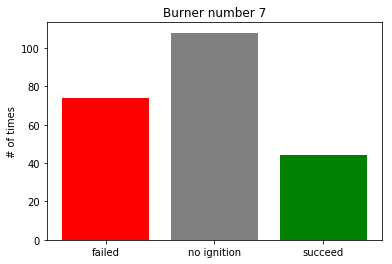

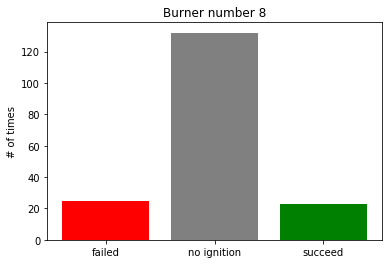

#### Focus only on observations where 'Attempt outcome' is equal to ' succeed' or 'failed'. Try to find parameters that affect the outcome. Use scatter plots, box plots or whatever you want. Once you think you found parameters that affect the attempt outcume, perform the p-values of Mann-Whitney rank test for burner number 1.

#### For the first two iterations of scatter plots I was trying to find patterns and look at the units of the data. I also tried to use LOF to see if there was some sort of trend going on.

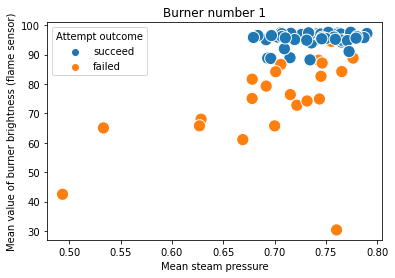

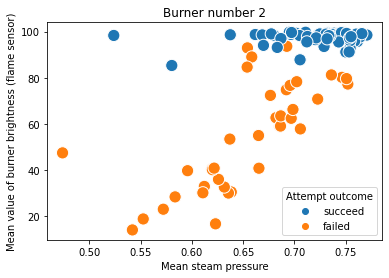

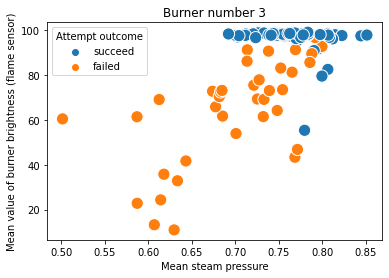

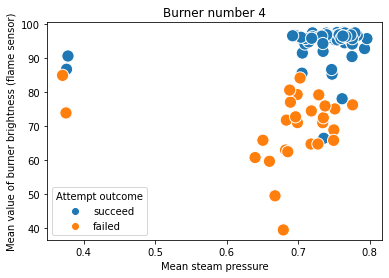

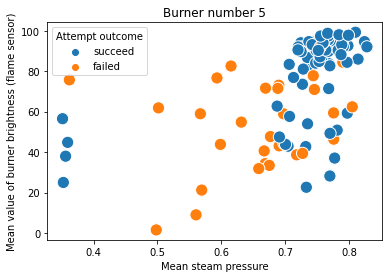

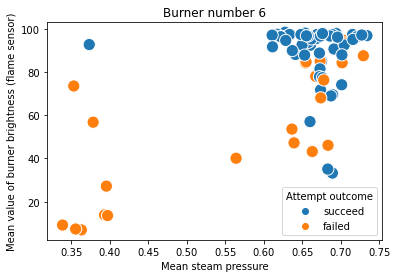

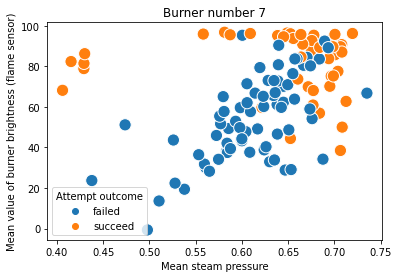

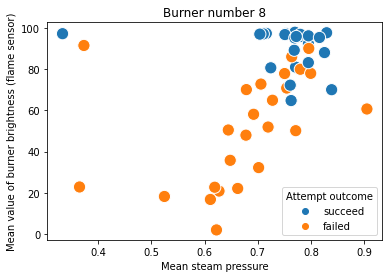

In [39]:
for i in range(9):
    for j in sub3[['Attempt outcome']]:
        if i>0 and i<9:
            sub3 = sub2[sub2['Burner number']== i]
            sub3 = sub3[sub3['Attempt outcome']!= 'no ignition']
            sns.scatterplot(x='Mean steam pressure', y='Mean value of burner brightness (flame sensor)', 
                            data=sub3, hue='Attempt outcome', s=150)
            plt.title('Burner number {}'.format(i));
            plt.show();

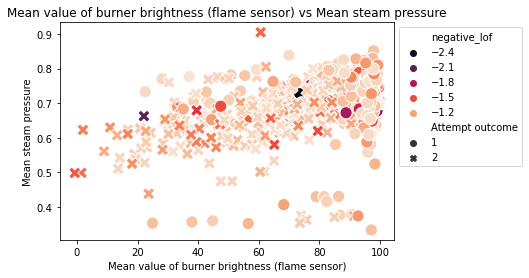

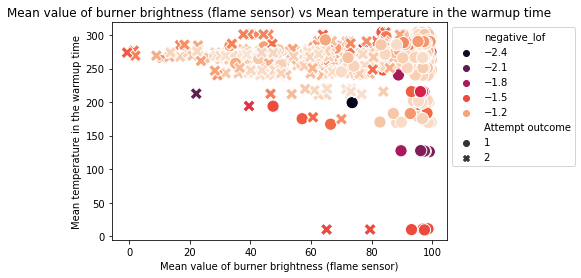

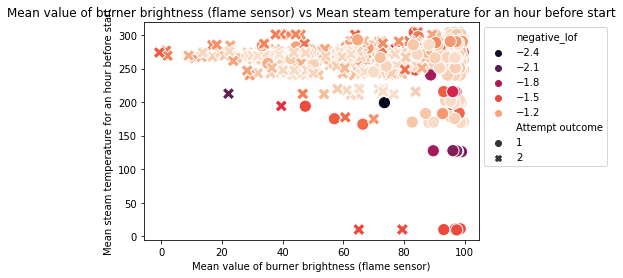

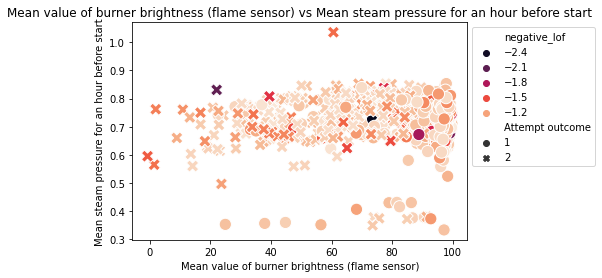

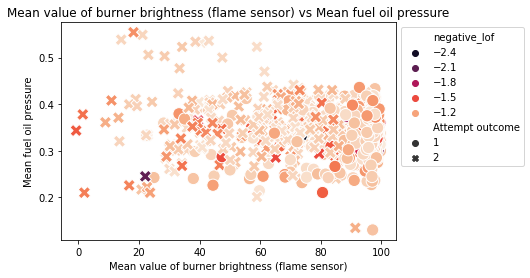

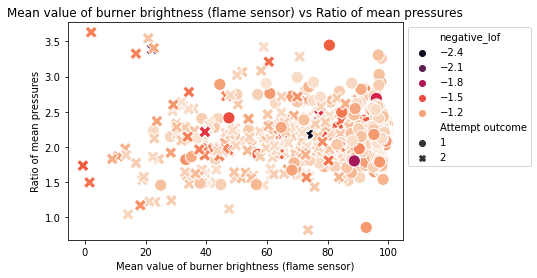

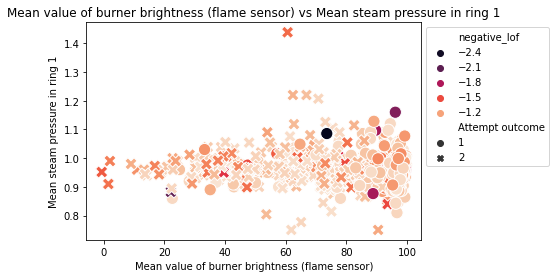

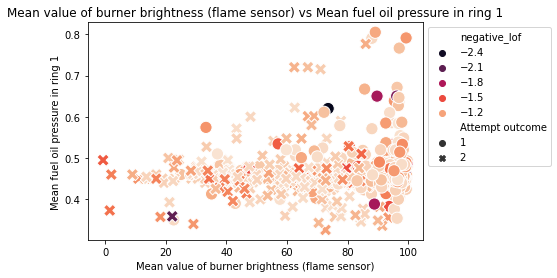

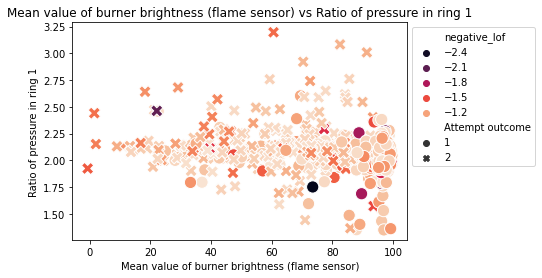

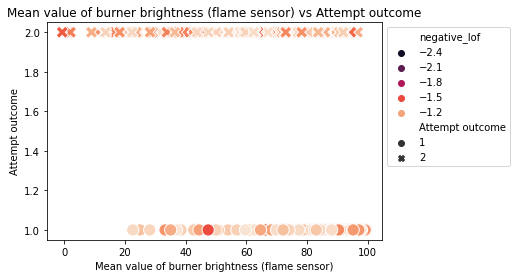

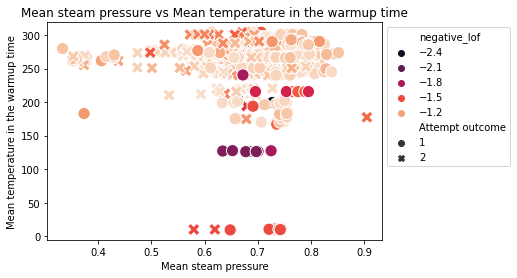

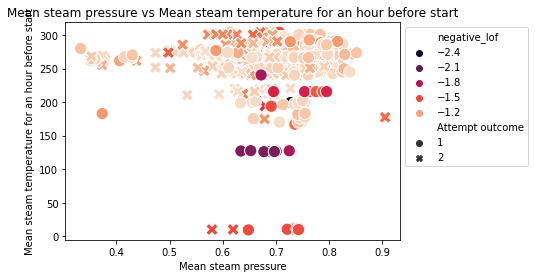

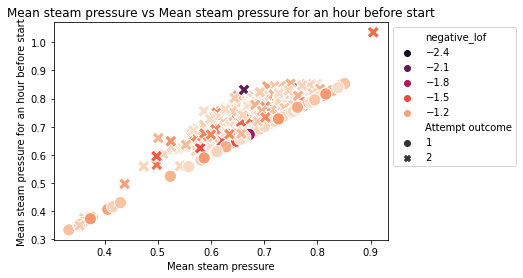

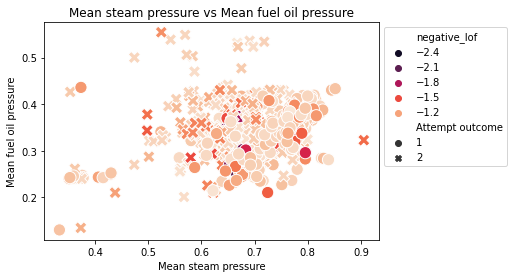

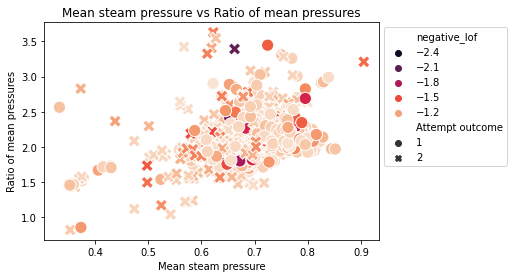

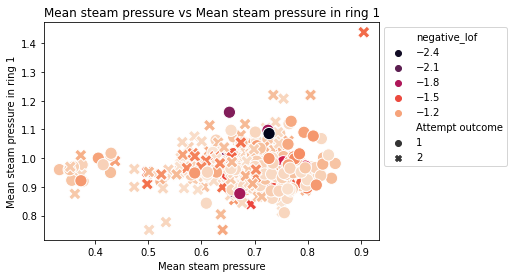

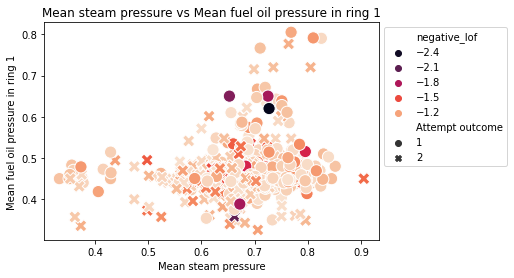

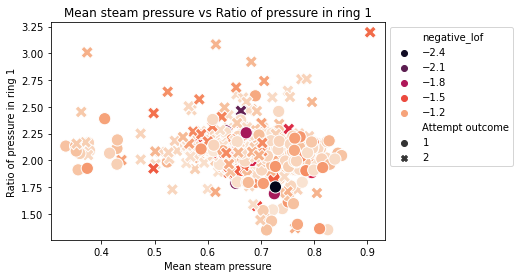

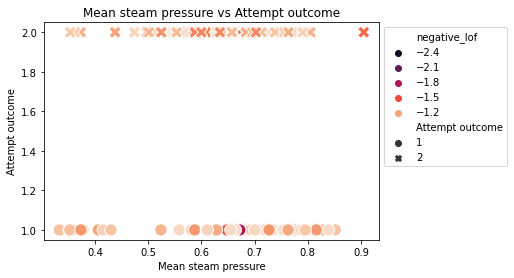

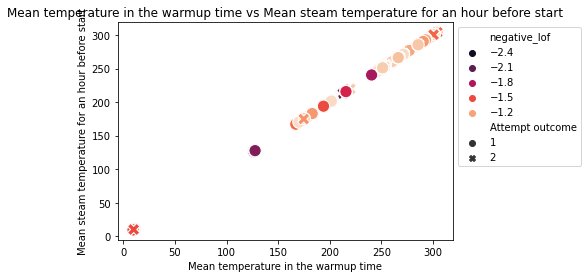

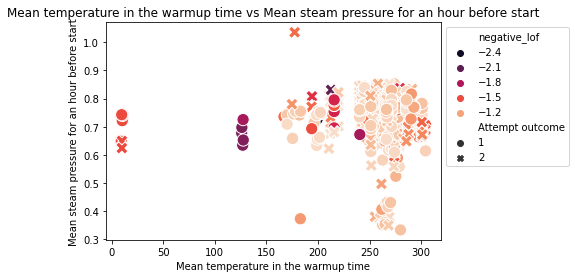

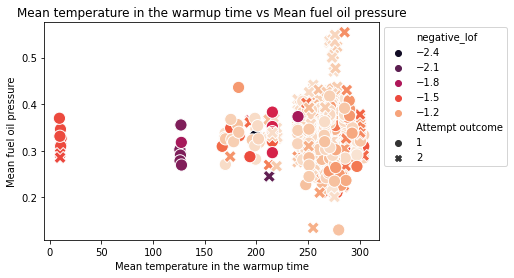

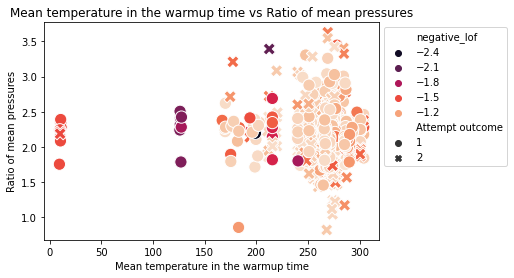

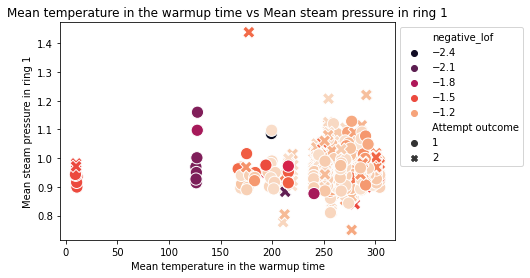

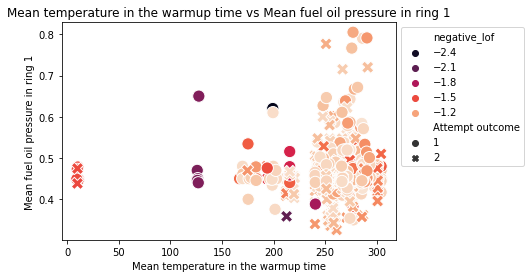

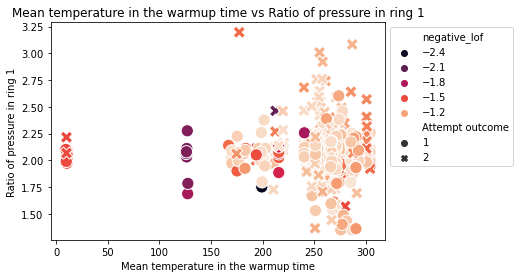

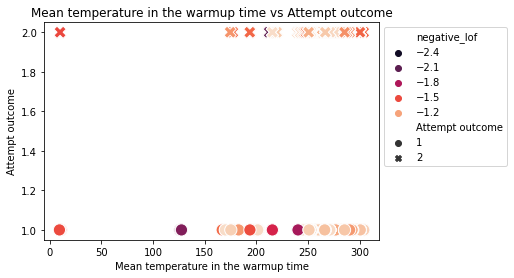

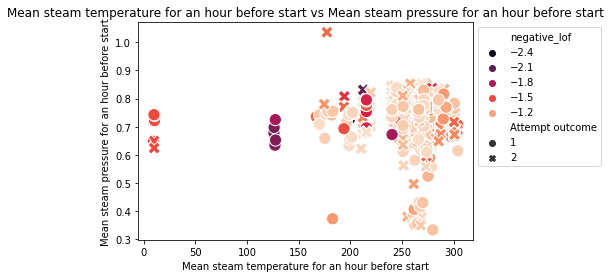

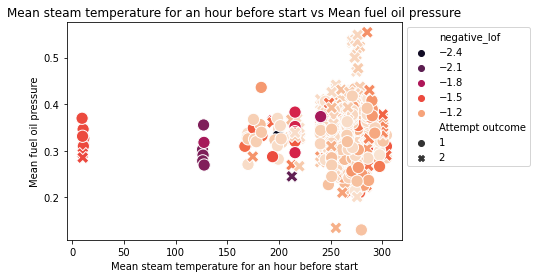

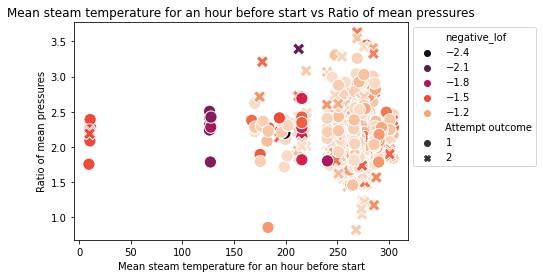

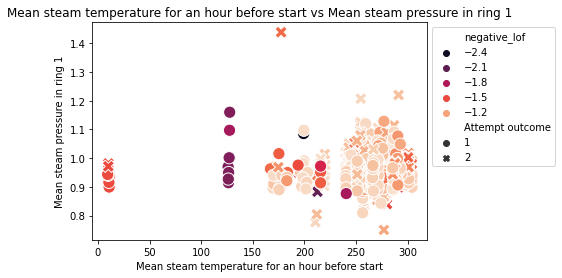

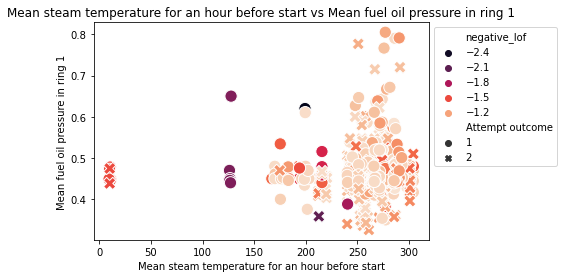

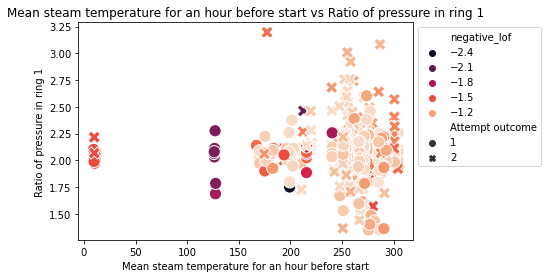

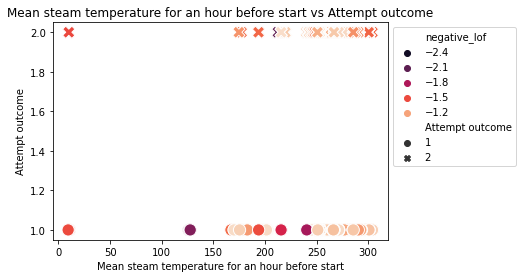

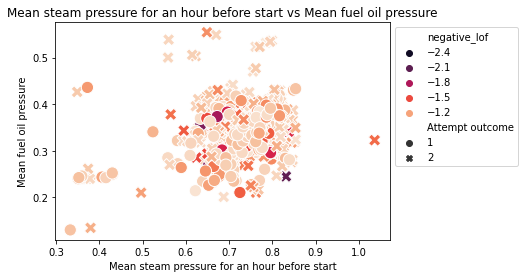

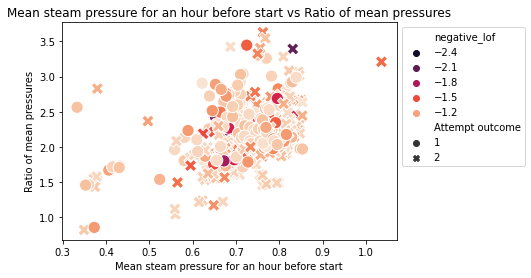

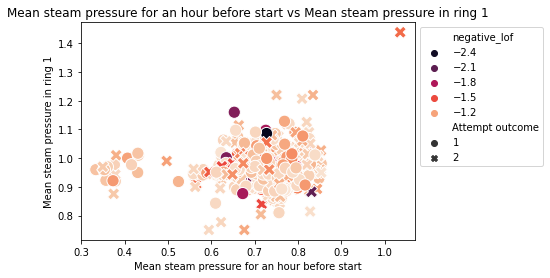

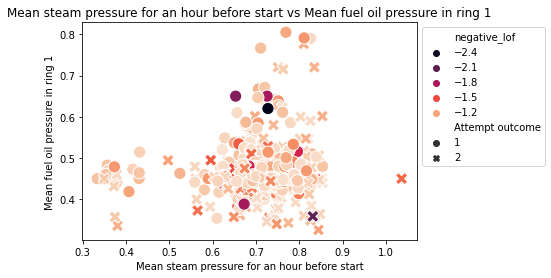

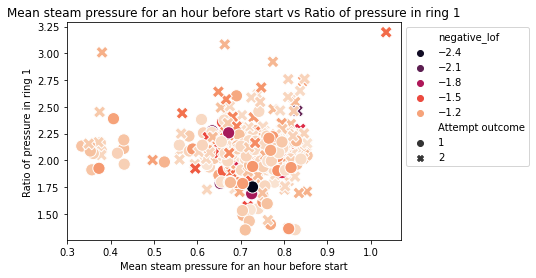

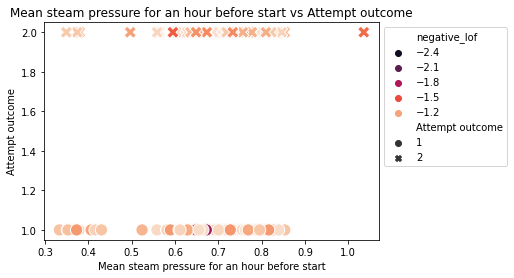

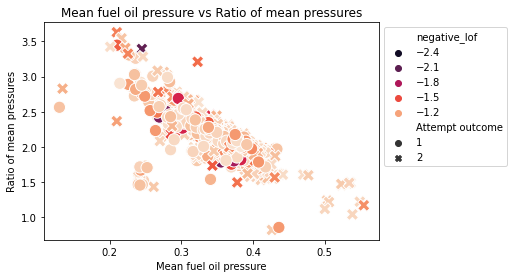

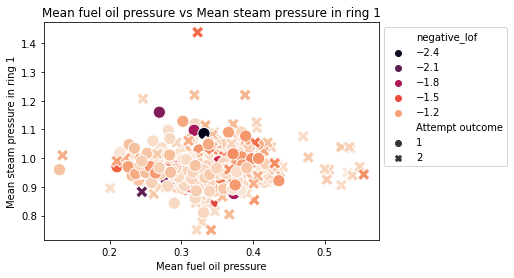

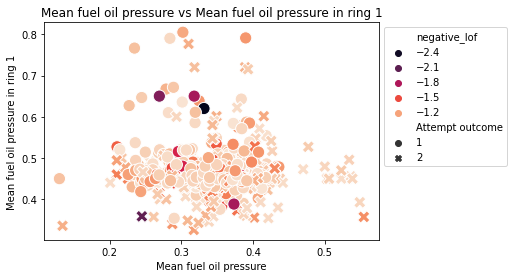

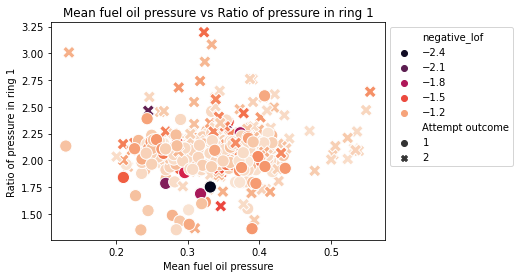

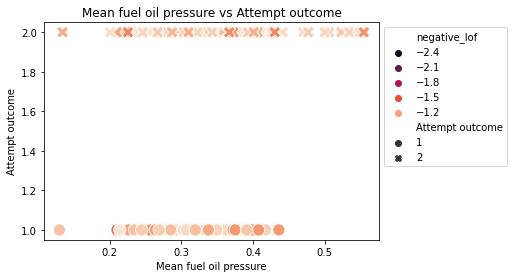

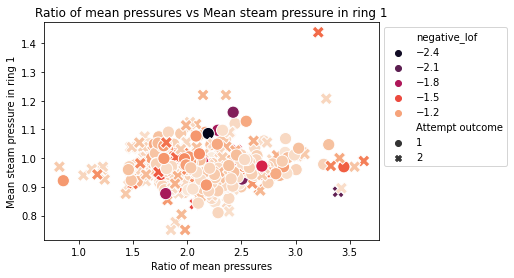

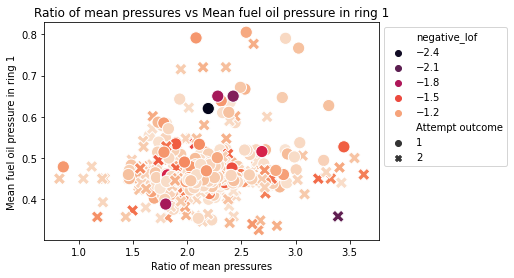

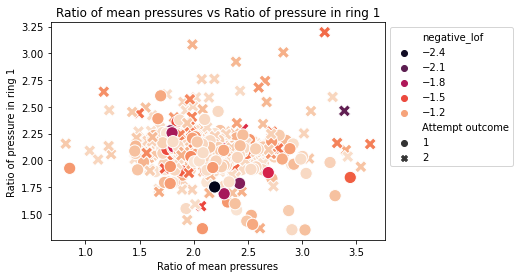

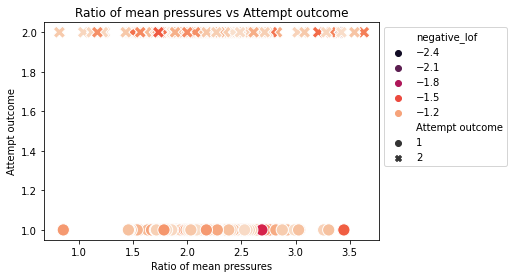

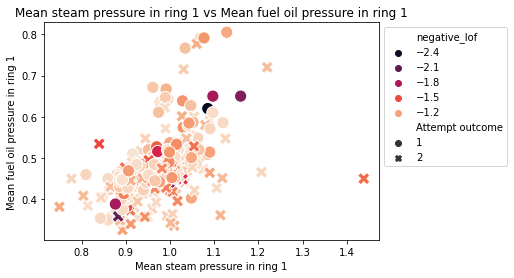

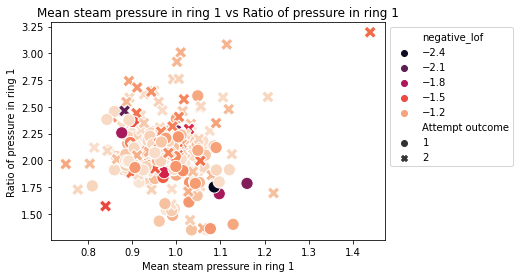

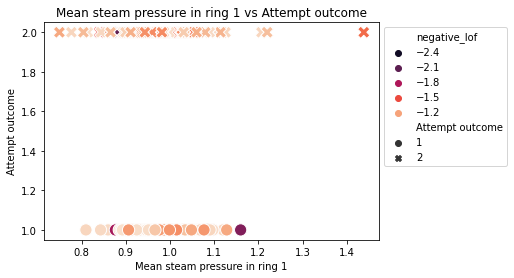

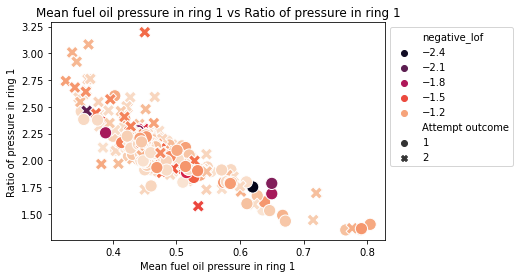

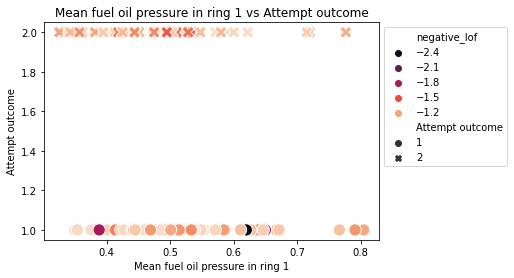

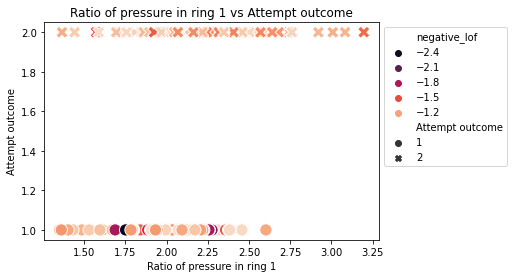

In [106]:
sub4 = sub1.copy()
sub4 = sub4[['Mean value of burner brightness (flame sensor)','Mean steam pressure','Mean temperature in the warmup time',
            'Mean steam temperature for an hour before start', 'Mean steam pressure for an hour before start',
            'Mean fuel oil pressure', 'Ratio of mean pressures', 'Mean steam pressure in ring 1', 
            'Mean fuel oil pressure in ring 1', 'Ratio of pressure in ring 1', 'Attempt outcome']]
sub4.set_index('Attempt outcome')
sub4.loc[sub4['Attempt outcome'] == 'succeed','Attempt outcome'] = 1
sub4.loc[sub4['Attempt outcome'] == 'failed','Attempt outcome'] = 2
sub4 = sub4[sub4['Attempt outcome'] != 'no ignition']
sub4 = sub4.reset_index(drop=True)
sub4 = sub4.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
sub4['Attempt outcome'] = pd.to_numeric(sub4['Attempt outcome'], errors='coerce')
lof = LocalOutlierFactor(n_neighbors=10, contamination='auto', novelty=False)
lof.fit(sub4)
lof.negative_outlier_factor_
sub4_results = sub4.copy()
neg_values = lof.negative_outlier_factor_
sub4_results['negative_lof'] = neg_values

for i in range(9):
    for j,col1 in enumerate(sub4.columns):
        for k,col2 in enumerate(sub4.columns):
            if i==1 and j!=k and j<k:
                sub5 = sub4_results[sub4_results['Attempt outcome']!= 'no ignition']
                sns.scatterplot(x=col1, y=col2, hue='negative_lof', palette="rocket", style='Attempt outcome',
                                data=sub5, s=150)
                plt.title('{} vs {}'.format(col1,col2));
                handles, labels = plt.gca().get_legend_handles_labels()
                by_label = dict(zip(labels, handles))
                plt.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1,1));
                plt.show();

#### In burner 1, the plot for mean steam pressure vs mean steam pressure for an hour before start seems to indicate there's a particular difference in behavior between successful and failed attempts, for the rest of the plots it's difficult to identify a pattern.

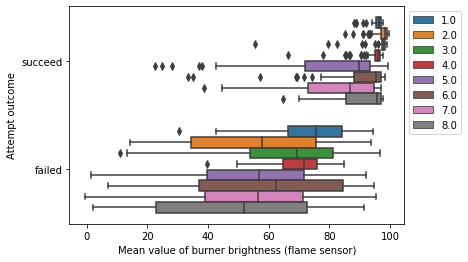

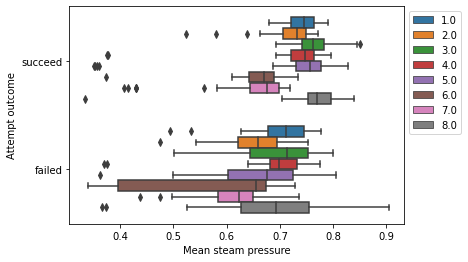

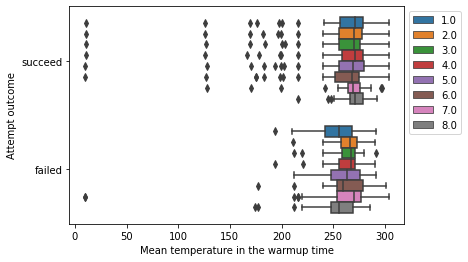

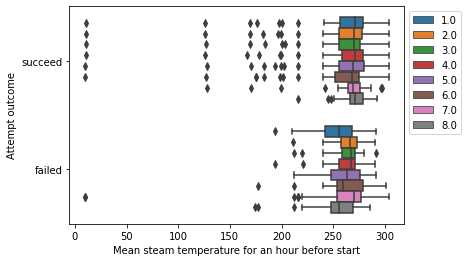

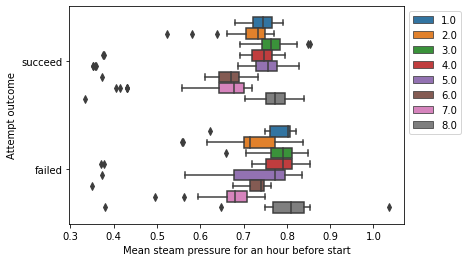

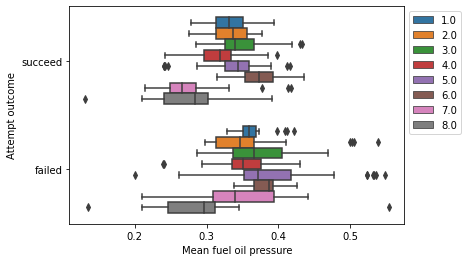

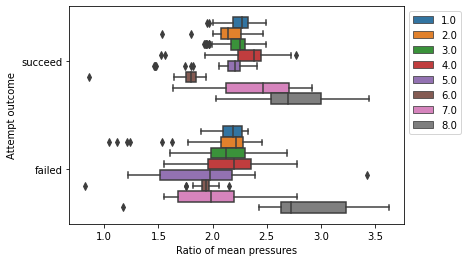

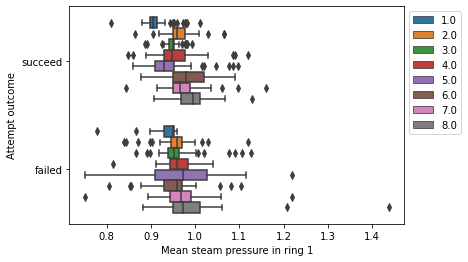

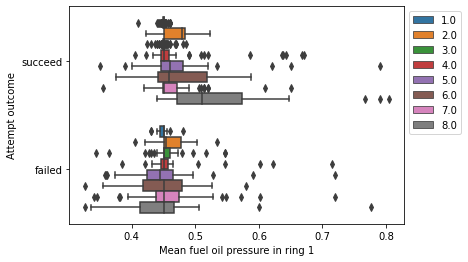

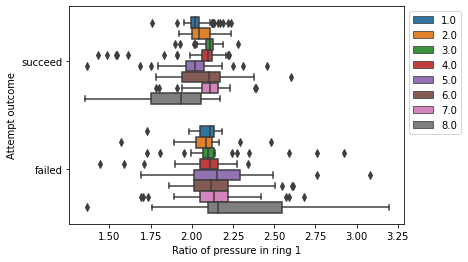

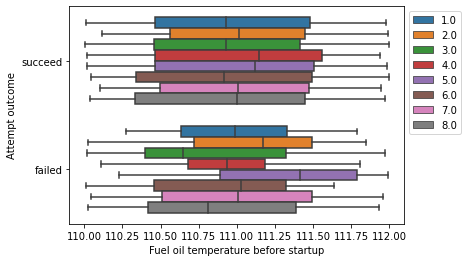

In [114]:
sub6 = sub1.copy()
sub6 = sub6.set_index('Burner number')
sub6 = sub6[['Mean value of burner brightness (flame sensor)','Mean steam pressure','Mean temperature in the warmup time',
            'Mean steam temperature for an hour before start', 'Mean steam pressure for an hour before start',
            'Mean fuel oil pressure', 'Ratio of mean pressures', 'Mean steam pressure in ring 1', 
            'Mean fuel oil pressure in ring 1', 'Ratio of pressure in ring 1', 'Fuel oil temperature before startup',
             'Attempt outcome']]
for i in range(9):
    for j,col1 in enumerate(sub6.columns):
        if i==1 and j!=11:
            sub7 = sub6[sub6['Attempt outcome']!= 'no ignition']
            sns.boxplot(x=col1, y='Attempt outcome', hue=sub7.index, data=sub7);
            handles, labels = plt.gca().get_legend_handles_labels()
            by_label = dict(zip(labels, handles))
            plt.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1,1));
            plt.show();

#### Box plot analysis for all burners to try and spot a general trend. Parameters such as mean temperature, mean steam temperature and fuel oil temperature do show a specific behavior. Doing box plot analysis for burner 1:

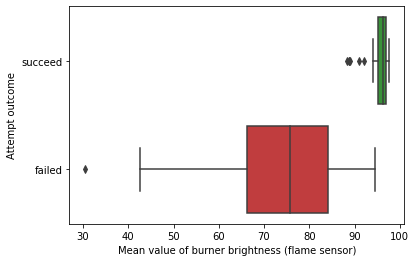

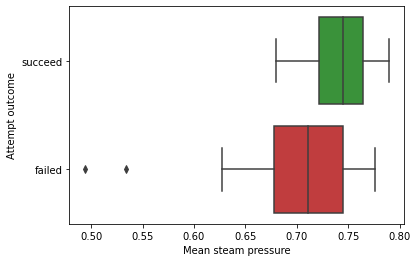

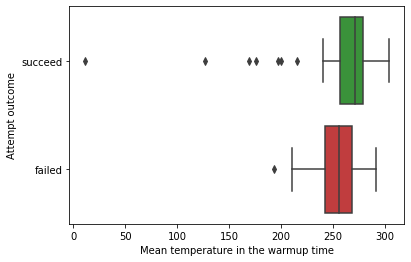

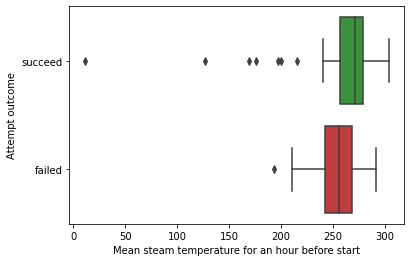

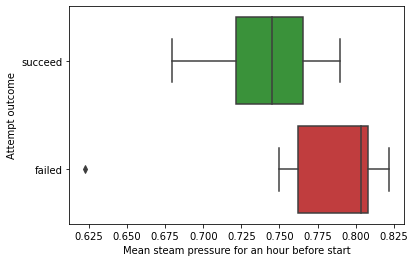

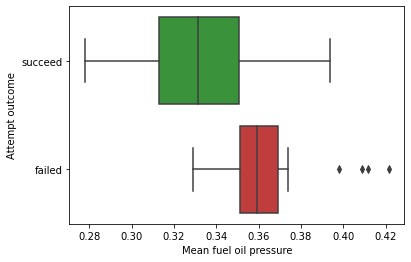

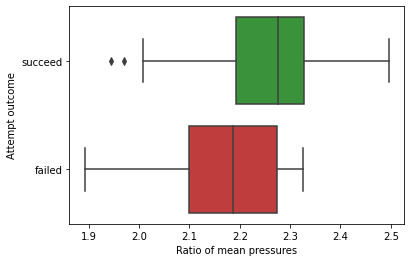

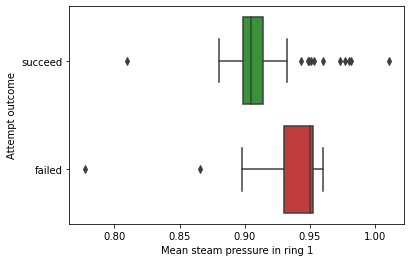

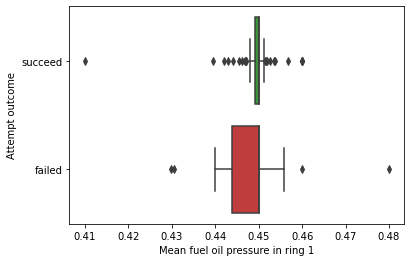

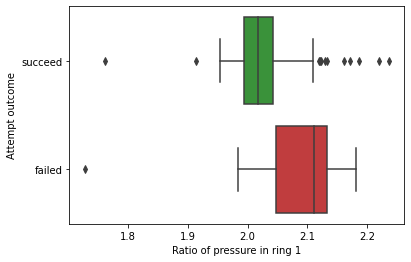

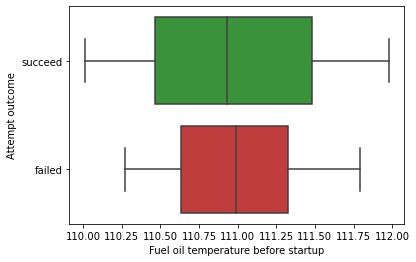

In [119]:
sub8 = sub1.copy()
sub8 = sub8[['Mean value of burner brightness (flame sensor)','Mean steam pressure','Mean temperature in the warmup time',
            'Mean steam temperature for an hour before start', 'Mean steam pressure for an hour before start',
            'Mean fuel oil pressure', 'Ratio of mean pressures', 'Mean steam pressure in ring 1', 
            'Mean fuel oil pressure in ring 1', 'Ratio of pressure in ring 1', 'Fuel oil temperature before startup',
             'Attempt outcome', 'Burner number']]
sub8 = sub8[sub8['Burner number'] == 1]

for i in range(9):
    for j,col1 in enumerate(sub8.columns):
        if i==1 and j<11:
            sub9 = sub8[sub8['Attempt outcome']!= 'no ignition']
            sns.boxplot(x=col1, y='Attempt outcome', data=sub9, palette=['tab:green','tab:red']);
            plt.show();

#### When ignition fails, it appears that the mean steam pressure for an hour before start is too high.

In [120]:
sub8_success = sub8[sub8['Attempt outcome']=='succeed']
sub8_failed = sub8[sub8['Attempt outcome']=='failed']

In [121]:
U, p = MWU(sub8_success['Mean steam pressure'], sub8_failed['Mean steam pressure'])
p

0.0011557331251609588

#### MWU test shows that h0 can be rejected for mean steam pressure, meaning steam pressure values for successful and failed attempts are in fact different. 

In [122]:
U, p = MWU(sub8_success['Mean steam pressure for an hour before start'], 
           sub8_failed['Mean steam pressure for an hour before start'])
p

4.582836672387912e-07

#### The difference in distribution is clearly seen also in the boxplots, therefore no surprise that mean steam pressure for an hour before start also has a value of p<0.05.

In [123]:
U, p = MWU(sub8_success['Mean temperature in the warmup time'], 
           sub8_failed['Mean temperature in the warmup time'])
p

0.004810279735137668

#### Since temperature is a function of pressure, the mean temperature for the mixture of oil and steam will also reject h0. 

In [124]:
U, p = MWU(sub8_success['Fuel oil temperature before startup'], 
           sub8_failed['Fuel oil temperature before startup'])
p

0.44136199389291814

In [125]:
U, p = MWU(sub8_success['Mean fuel oil pressure in ring 1'], 
           sub8_failed['Mean fuel oil pressure in ring 1'])
p

0.3258492910241486

#### The mean fuel oil pressure in ring 1 and the temperature of the fuel oil can't reject h0, which means these parameters are not the reason why burners are not igniting.

In [130]:
sub8_success['Mean steam pressure'].median()

0.7446897327899933

In [131]:
sub8_failed['Mean steam pressure'].median()

0.7106395065784454

In [132]:
sub8_success['Mean steam pressure for an hour before start'].median()

0.7449118196964264

In [133]:
sub8_failed['Mean steam pressure for an hour before start'].median()

0.8035866022109985

#### In conclusion, regulating mean steam pressure in such a way that the median approaches 0.74 is vital to increase the probability that the burners will ignite. 